## 1.Introduction

In [ ]:
class Student:
    
    def __init__(self,name,ID,Major,Year):
        self.name=name
        self.ID=ID
        self.Major=Major
        self.Year=Year
        
    def __str__(self):
        return 'My name is {self.name}\nMy ID number is {self.ID}\nI study  {self.Major} in the {self.Year} year'.format(self=self)
    


class Project(Student):
    def __init__(self,name,ID,Major,Year,project_name,deadline,presentation):
        Student.__init__(self,name,ID,Major,Year)
        self.project_name =project_name
        self.deadline=deadline
        self.presentation=presentation
         
   
    def __str__(self):
        return'Project name is {self.project_name}\nThe Deadline is {self.deadline}\nthe presentation date {self.presentation} '.format(self=self)
    
                     
  
    def submit(self):
        if self.deadline <='18/02/2021':
            return 'on time submission!'
        else:
            return 'late submission!'
        
Majdal=Student('Majdal Hindi',"300991890","Data Science",'second')
print(Majdal)
Python=Project('Majdal Hindi',"300991890","Data Science",'second','The World Happiness 2015-2019','18/02/2021','07/03/2021')
print(Python)
print(Python.submit())

My name is Majdal Hindi
My ID number is 300991890
I study  Data Science in the second year
Project name is The World Happiness 2015-2019
The Deadline is 18/02/2021
the presentation date 07/03/2021 
on time submission!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 2.Exploring  World Happiness Report 2015

In [ ]:
df2015=pd.read_csv("2015.csv")
print(df2015.shape)                          #The report has 158 rows and 12 columns

(158, 12)


In [ ]:
df2015.info()                               # Country and Region coulmns are categorical variables
                                            # The rest columns are numerical variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
df2015.isnull().any()                       #There is no null values

Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

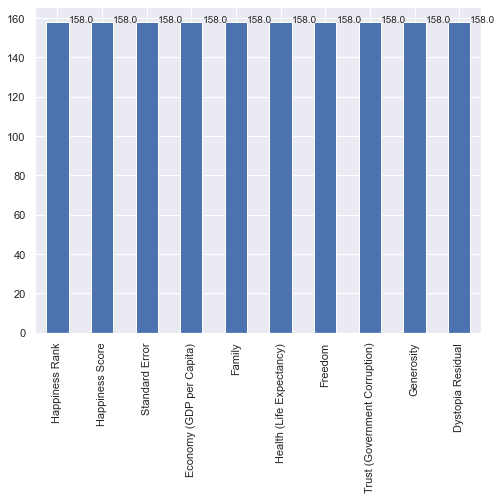

In [ ]:
#plotting the null values:

plt.figure(figsize=(8,6))
fig1 = df2015.describe().loc["count"].plot(kind="bar")
for p in fig1.patches:
    fig1.annotate(format(p.get_height()),(p.get_x() + p.get_width(), p.get_height()))  #there is no Null values

In [ ]:
df2015.head(2)      #displaying the first rows of the data                       

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [ ]:
df2015.columns.values               #The columns have long names 
                                    #we can drop Standard Error and Dystopia Residual columns

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

In [ ]:
#I changed the names of some columns, to make it easier to work with 

In [ ]:
df2015.columns=["Country","Region","Happiness_Rank","Happiness_Score","Standard_Error","Economy","Family","Health","Freedom","Trust","Generosity","Dystopia_Residual"]

In [ ]:
#lets drop [Standard Error,Dystopia Residual columns] from the dataset as we know that these factors were not usefull in our exploration

In [ ]:
#dropping some rows and diplaying the result
df2015.drop(["Standard_Error","Dystopia_Residual"], axis=1, inplace=True)
df2015.head(2)

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


In [ ]:
df2015.tail(2)

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727
157,Togo,Sub-Saharan Africa,158,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681


In [ ]:
df2015.describe()                # shows only numerical features

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [ ]:
any(df2015.duplicated('Country').values)   #there is no duplication in the Country columns 

False

In [ ]:
#Some comments about the describtion table:

C:\Users\Acc\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness_Score', ylabel='Density'>

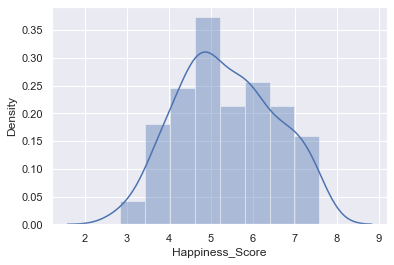

In [ ]:
#The distribution of the Happiness Score:
sns.distplot(df2015['Happiness_Score'])
#The distribution of the happiness score is distributed  between 2.839-7.587

## 3.Exploring the Categorical Variables vs. Happiness Score:

In [ ]:
df2015["Region"].unique()  #The names of the regions

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [ ]:
len(df2015["Region"].unique())       #there are 10 regions

10

In [ ]:
#How many countries are in each region?
df2015.groupby("Region")["Country"].count().sort_values(ascending=False)
# 40 countries in sub-Saharan Africa, 2 countries in Asuralia and New Zealand

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Country, dtype: int64

C:\Users\Acc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

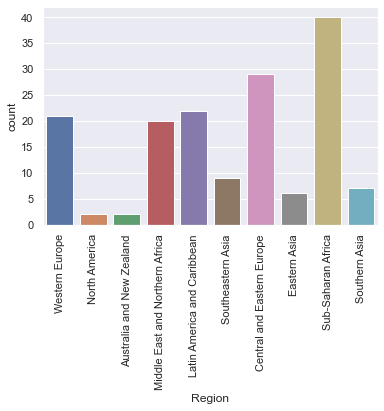

In [ ]:
#plotting the number of countries in each region 
sns.countplot(df2015["Region"], data=df2015)
plt.xticks(rotation=90)

In [ ]:
#The average of the Happiness_Score in each region:
df2015.groupby("Region")["Happiness_Score"].mean().sort_values(ascending=False)  

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness_Score, dtype: float64

In [ ]:
#We can notice that (Australia and New Zealand)  region is the happiest,(Sub-Saharan Africa) is the least happy region 

<AxesSubplot:title={'center':'Happiness Scores by Region'}, ylabel='Region'>

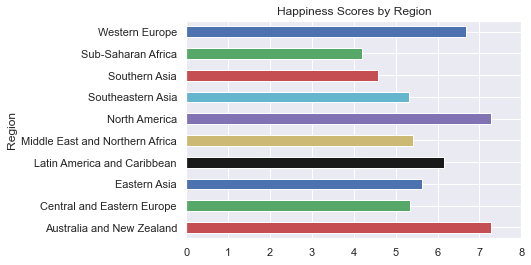

In [ ]:
# Plotting Region vs. Happiness Score
df2015.groupby("Region")["Happiness_Score"].mean().plot(y='Region',x='Happiness_Score', kind='barh', title='Happiness Scores by Region', xlim=(0,8),color=list('rgbkymc'))

In [ ]:
#finding the maximum,minimum value and the difference between the maximum/minimum value and the mean of Happiness Score for each region

def dif_max(group):
    return (group.max() - group.mean())     #function that calculates the difference between the mean and the maximum value

def dif_min(group):
    return (group.mean()-group.min())      # #function that calculates the difference between the mean and the minimum value

df2015.groupby('Region')['Happiness_Score'].agg([np.mean,np.max,np.min,dif_max,dif_min,np.median,np.std])


,mean,amax,amin,dif_max,dif_min,median,std
Region,,,,,,,
Australia and New Zealand,7.285000,7.286,7.284,0.001000,0.001000,7.285,0.001414
Central and Eastern Europe,5.332931,6.505,4.218,1.172069,1.114931,5.286,0.570446
Eastern Asia,5.626167,6.298,4.874,0.671833,0.752167,5.729,0.554053
Latin America and Caribbean,6.144682,7.226,4.518,1.081318,1.626682,6.149,0.728560
Middle East and Northern Africa,5.406900,7.278,3.006,1.871100,2.400900,5.262,1.101382
North America,7.273000,7.427,7.119,0.154000,0.154000,7.273,0.217789
Southeastern Asia,5.317444,6.798,3.819,1.480556,1.498444,5.360,0.950020
Southern Asia,4.580857,5.253,3.575,0.672143,1.005857,4.565,0.570526
Sub-Saharan Africa,4.202800,5.477,2.839,1.274200,1.363800,4.272,0.609557


In [ ]:
#For each region and country, what is the  mean of the Happiness_Score?
df2015.groupby(["Region","Country"])["Happiness_Score"].agg(["mean"])

mean
Region                     Country              
Australia and New Zealand  Australia       7.284
                           New Zealand     7.286
Central and Eastern Europe Albania         4.959
                           Armenia         4.350
                           Azerbaijan      5.212
...                                          ...
Western Europe             Portugal        5.102
                           Spain           6.329
                           Sweden          7.364
                           Switzerland     7.587
                           United Kingdom  6.867

[158 rows x 1 columns]

In [ ]:
#The 10 happiest countries (by Happiness_Score)?
df2015.groupby("Country")["Happiness_Score"].mean().sort_values(ascending=False).head(10) 

Country
Switzerland    7.587
Iceland        7.561
Denmark        7.527
Norway         7.522
Canada         7.427
Finland        7.406
Netherlands    7.378
Sweden         7.364
New Zealand    7.286
Australia      7.284
Name: Happiness_Score, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Switzerland'),
  Text(1, 0, 'Iceland'),
  Text(2, 0, 'Denmark'),
  Text(3, 0, 'Norway'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Finland'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'Sweden'),
  Text(8, 0, 'New Zealand'),
  Text(9, 0, 'Australia')])

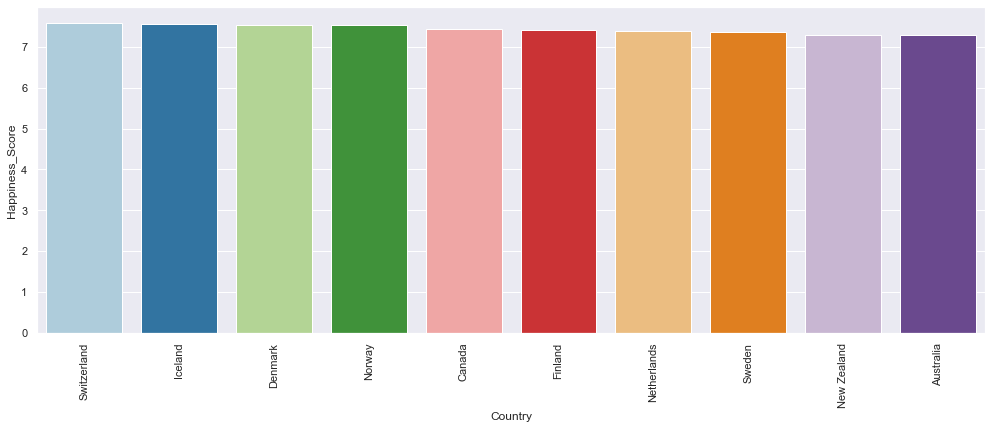

In [ ]:
# Plotting the 10 happiest countries
plt.figure(figsize=(17, 6))
g=sns.barplot(x ='Country', y ='Happiness_Score', data = df2015.head(10), palette ='Paired') 
plt.xticks(rotation=90)

In [ ]:
df2015[df2015['Country']=='Switzerland'] #Switzerland is the happiest country in 2015, we notice that the economy factor in Switzerland is very high

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678


In [ ]:
# the 10 least happy countries (by Happiness_Score)?
df2015.groupby("Country")["Happiness_Score"].mean().sort_values(ascending=True).head(10) 

Country
Togo            2.839
Burundi         2.905
Syria           3.006
Benin           3.340
Rwanda          3.465
Afghanistan     3.575
Burkina Faso    3.587
Ivory Coast     3.655
Guinea          3.656
Chad            3.667
Name: Happiness_Score, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Chad'),
  Text(1, 0, 'Guinea'),
  Text(2, 0, 'Ivory Coast'),
  Text(3, 0, 'Burkina Faso'),
  Text(4, 0, 'Afghanistan'),
  Text(5, 0, 'Rwanda'),
  Text(6, 0, 'Benin'),
  Text(7, 0, 'Syria'),
  Text(8, 0, 'Burundi'),
  Text(9, 0, 'Togo')])

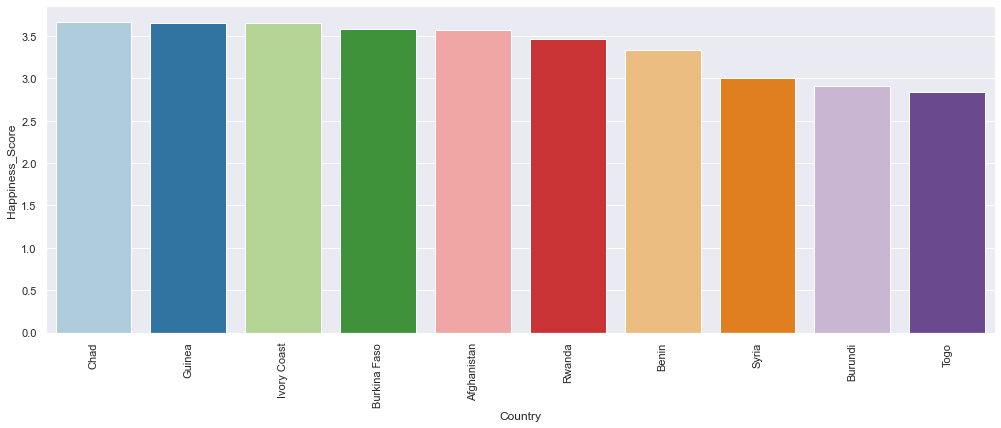

In [ ]:
# Plotting the 10 least happy countries

plt.figure(figsize=(17, 6))
g=sns.barplot(x ='Country', y ='Happiness_Score', data = df2015.tail(10), palette ='Paired') 
plt.xticks(rotation=90)

In [ ]:
df2015[df2015['Country']=='Togo'] #Togo is the least happy country in 2015

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
157,Togo,Sub-Saharan Africa,158,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681


In [ ]:
#For each Region, which is the happiest country? 
idx=df2015.groupby("Region")["Happiness_Score"].idxmax()
df2015.loc[idx,["Region","Country"]]                       

,Region,Country
8,Australia and New Zealand,New Zealand
30,Central and Eastern Europe,Czech Republic
37,Eastern Asia,Taiwan
11,Latin America and Caribbean,Costa Rica
10,Middle East and Northern Africa,Israel
4,North America,Canada
23,Southeastern Asia,Singapore
78,Southern Asia,Bhutan
70,Sub-Saharan Africa,Mauritius
0,Western Europe,Switzerland


In [ ]:
#The happiest country in Middle East and Northern Africa is Israel!

In [ ]:
#For each Region, which is the least happiest country? 
idx=df2015.groupby("Region")["Happiness_Score"].idxmin()
df2015.loc[idx,["Region","Country"]]

,Region,Country
9,Australia and New Zealand,Australia
133,Central and Eastern Europe,Bulgaria
99,Eastern Asia,Mongolia
118,Latin America and Caribbean,Haiti
155,Middle East and Northern Africa,Syria
14,North America,United States
144,Southeastern Asia,Cambodia
152,Southern Asia,Afghanistan
157,Sub-Saharan Africa,Togo
101,Western Europe,Greece


In [ ]:
df2015[df2015['Country']=='Syria'] #we can see also syria is one of the least happy countries, if we check the factors we can see the freedom is very low (There is war!)

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
155,Syria,Middle East and Northern Africa,156,3.006,0.6632,0.47489,0.72193,0.15684,0.18906,0.47179


<AxesSubplot:title={'center':'Middle East and Northern Africa'}, ylabel='Country'>

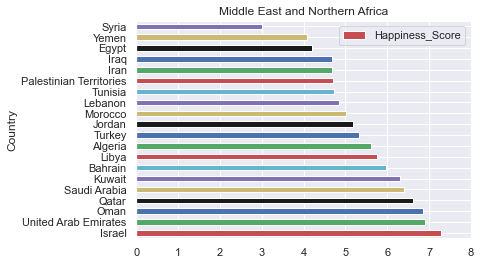

In [ ]:
#plotting the countries in Middle East and North Africa vs.Happiness_Score:

df2015[df2015['Region'] == 'Middle East and Northern Africa'].plot(x='Country', y='Happiness_Score', kind='barh', title='Middle East and Northern Africa', xlim=(0,8),color=list('rgbkymc'))

#syria in the bottom, Israel in the top 

<AxesSubplot:title={'center':'Southern Asia Happiness Scores'}, ylabel='Country'>

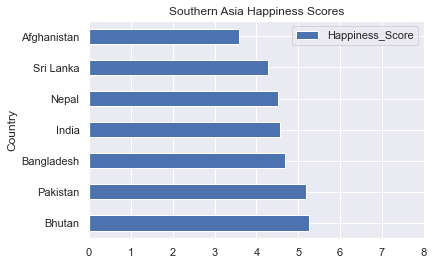

In [ ]:
#plotting the countries in Southern Asia vs.Happiness_Score:
df2015[df2015['Region'] == 'Southern Asia'].plot(x='Country', y='Happiness_Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,8))


### 4.Exploring  the Numerical Variables: how the Social Factors contribute to The Happiness in the World

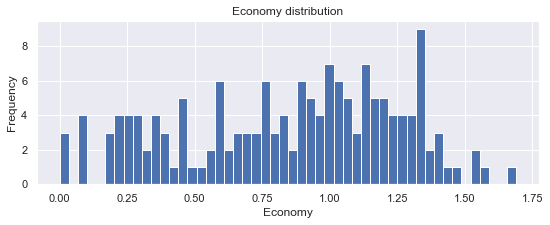

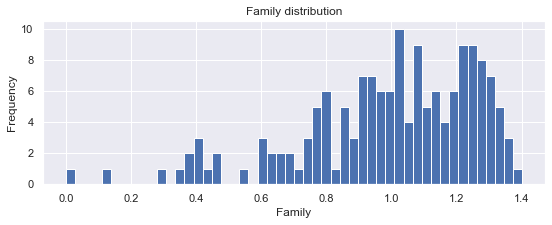

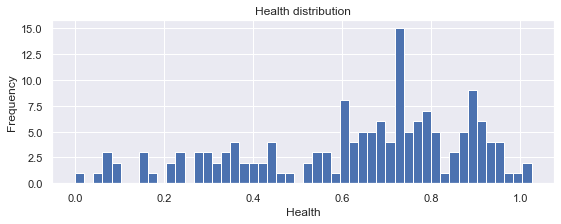

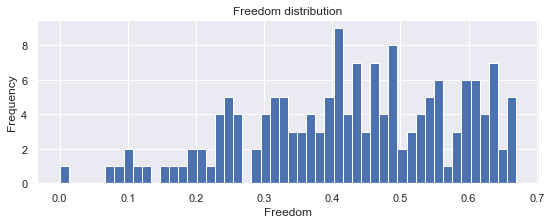

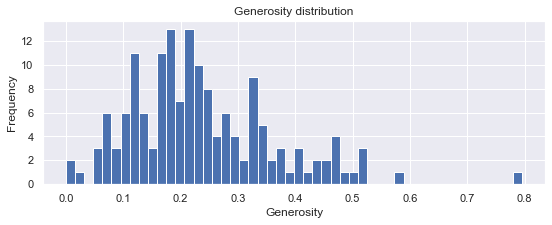

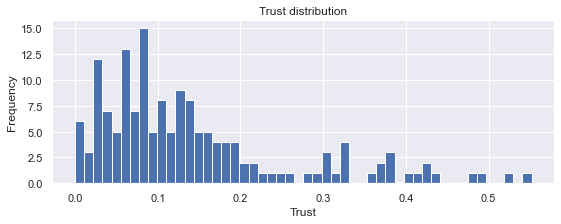

In [ ]:
#plotting the numericaL  variables distribution

factors = ['Economy','Family','Health','Freedom','Generosity','Trust']

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df2015[variable],bins = 50)   
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution".format(variable))
    plt.show()

for variable in factors:
    plot_hist(variable)

<AxesSubplot:ylabel='value'>

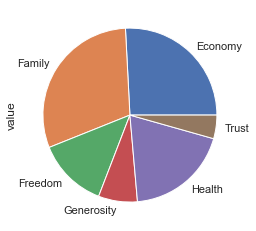

In [ ]:
#plotting the frequency of the  factors 

main_cols = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score']
pd.melt(df2015,main_cols,factors).pivot_table(index="variable",values="value").plot(kind="pie",y="value",legend=False)

#we can notice that the Family,Economy and the Health are the most powrerful factors that contribut to the world happiness in 2015

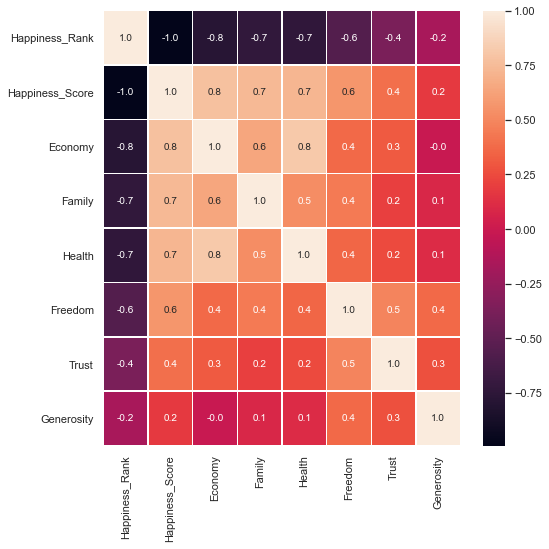

In [ ]:
#the correlation between the factors: 
fig,ax1 = plt.subplots(figsize=(8,8))
sns.heatmap(df2015.corr(),annot=True, linewidth=.5,fmt='.1f',ax=ax1)
plt.show()



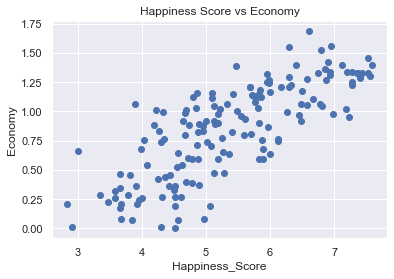

In [ ]:
#the corrolation between the Happiness Score and the Economy:

plt.scatter(df2015["Happiness_Score"],df2015["Economy"])
plt.xlabel("Happiness_Score")
plt.ylabel("Economy")
plt.title("Happiness Score vs Economy")
plt.show()

#There is positive correlation  between the Economy and The happiness_Score ; both variables move in the same direction

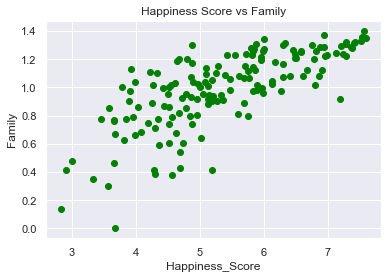

In [ ]:
plt.scatter(df2015["Happiness_Score"],df2015["Family"],c="green")
plt.xlabel("Happiness_Score")
plt.ylabel("Family")
plt.title("Happiness Score vs Family")
plt.show()


#There is positive correlation  between the Family and The happiness_Score ; both variables move in the same direction

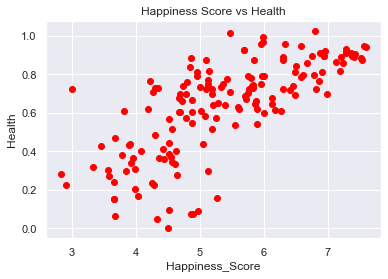

In [ ]:
plt.scatter(df2015["Happiness_Score"],df2015["Health"],c="red")
plt.xlabel("Happiness_Score")
plt.ylabel("Health")
plt.title("Happiness Score vs Health")
plt.show()

#There is positive correlation  between the Health and The happiness_Score ; both variables move in the same direction

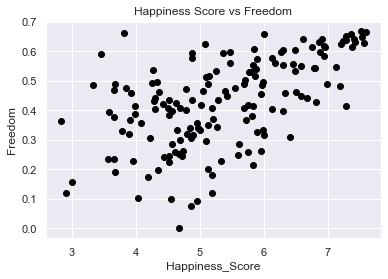

In [ ]:
plt.scatter(df2015["Happiness_Score"],df2015["Freedom"],c="black")
plt.xlabel("Happiness_Score")
plt.ylabel("Freedom")
plt.title("Happiness Score vs Freedom")
plt.show()

#There is positive correlation  between the Freedom and The happiness_Score ; both variables move in the same direction

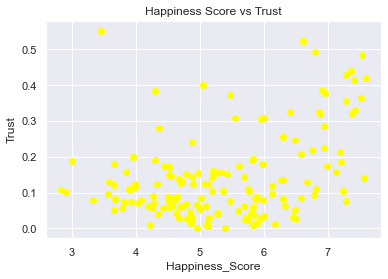

In [ ]:
plt.scatter(df2015["Happiness_Score"],df2015["Trust"],c="yellow")
plt.xlabel("Happiness_Score")
plt.ylabel("Trust")
plt.title("Happiness Score vs Trust")
plt.show()

#There is MODERATE positive correlation  between the Trust and The happiness_Score ; both variables move in the same direction

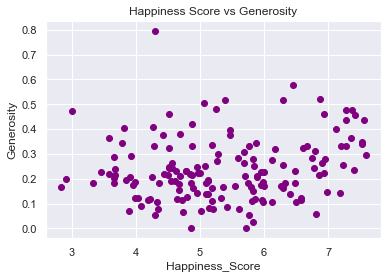

In [ ]:
plt.scatter(df2015["Happiness_Score"],df2015["Generosity"],c="purple")
plt.xlabel("Happiness_Score")
plt.ylabel("Generosity")
plt.title("Happiness Score vs Generosity")
plt.show()

#The relationship between the happiness score and the generosity is very weak, almost ther is no relation!

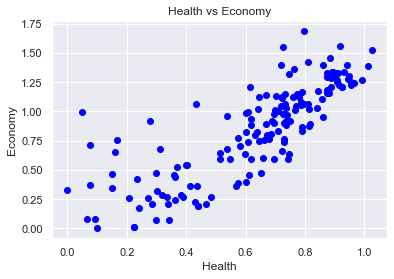

In [ ]:
plt.scatter(df2015["Health"],df2015["Economy"],c="blue")
plt.xlabel("Health")
plt.ylabel("Economy")
plt.title("Health vs Economy")
plt.show()

#We can say that the higher Economy, the higher Healthy life expectancy.
#There is positive correlation between them,both variables move in the same direction.

Text(0.5, 1.0, 'Family vs Economy')

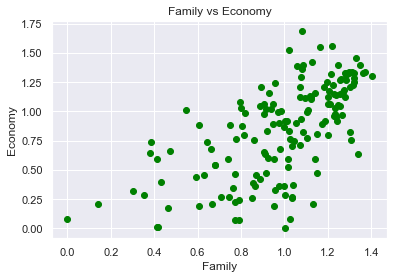

In [ ]:
plt.scatter(df2015["Family"],df2015["Economy"],c="green")
plt.xlabel("Family")
plt.ylabel("Economy")
plt.title("Family vs Economy")

#strong relationship between the Economy and the Family 0.6.
#There is positive correlation between them,both variables move in the same direction.

Text(0.5, 1.0, 'Generosity vs Economy')

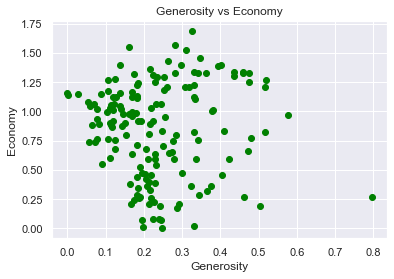

In [ ]:
plt.scatter(df2015["Generosity"],df2015["Economy"],c="green")
plt.xlabel("Generosity")
plt.ylabel("Economy")
plt.title("Generosity vs Economy")

#There is no relationship between the Generosity and the Economy

In [ ]:
#describing the mean of the factors vs Regions
df2015.pivot_table(factors, 'Region')

#North America has 2 countries, the highest economy factor mean, the second in Family,generosity,Trust.The third in Health.
#Australia and New Zealand has the highest family,freedom,generosity,health and trust factor mean (this region has only two coumtries)
#Western Europe has 21 countries, the second in Economy,Freedom,Health ,third in Family,the fifth in generosity, and third in Trust 
#Comparing the regions in relative to the number of the counrties and the social factors, West Europe is the happiest!


,Economy,Family,Freedom,Generosity,Health,Trust
Region,,,,,,
Australia and New Zealand,1.291880,1.314450,0.645310,0.455315,0.919965,0.392795
Central and Eastern Europe,0.942438,1.053042,0.358269,0.152264,0.718774,0.086674
Eastern Asia,1.151780,1.099427,0.462490,0.225885,0.877388,0.127695
Latin America and Caribbean,0.876815,1.104720,0.501740,0.217788,0.703870,0.117172
Middle East and Northern Africa,1.066973,0.920490,0.361751,0.190375,0.705616,0.181702
North America,1.360400,1.284860,0.589505,0.429580,0.883710,0.244235
Southeastern Asia,0.789054,0.940468,0.557104,0.419261,0.677357,0.151276
Southern Asia,0.560486,0.645321,0.373337,0.341429,0.540830,0.102536
Sub-Saharan Africa,0.380473,0.809085,0.365944,0.221137,0.282332,0.123878


In [ ]:
#describing the most powerful factors values vs Country 
df2015.groupby("Country")[factors].agg([np.max,np.mean,dif_max]).head(10)          
#the dif_max function was defined previously (max value-mean)

Economy                    Family                    Health  \
                amax     mean dif_max     amax     mean dif_max     amax   
Country                                                                    
Afghanistan  0.31982  0.31982     0.0  0.30285  0.30285     0.0  0.30335   
Albania      0.87867  0.87867     0.0  0.80434  0.80434     0.0  0.81325   
Algeria      0.93929  0.93929     0.0  1.07772  1.07772     0.0  0.61766   
Angola       0.75778  0.75778     0.0  0.86040  0.86040     0.0  0.16683   
Argentina    1.05351  1.05351     0.0  1.24823  1.24823     0.0  0.78723   
Armenia      0.76821  0.76821     0.0  0.77711  0.77711     0.0  0.72990   
Australia    1.33358  1.33358     0.0  1.30923  1.30923     0.0  0.93156   
Austria      1.33723  1.33723     0.0  1.29704  1.29704     0.0  0.89042   
Azerbaijan   1.02389  1.02389     0.0  0.93793  0.93793     0.0  0.64045   
Bahrain      1.32376  1.32376     0.0  1.21624  1.21624     0.0  0.74716   

                              Freedom                  Generosity           \
                mean dif_max     amax     mean dif_max       amax     mean   
Country                                                                      
Afghanistan  0.30335     0.0  0.23414  0.23414     0.0    0.36510  0.36510   
Albania      0.81325     0.0  0.35733  0.35733     0.0    0.14272  0.14272   
Algeria      0.61766     0.0  0.28579  0.28579     0.0    0.07822  0.07822   
Angola       0.16683     0.0  0.10384  0.10384     0.0    0.12344  0.12344   
Argentina    0.78723     0.0  0.44974  0.44974     0.0    0.11451  0.11451   
Armenia      0.72990     0.0  0.19847  0.19847     0.0    0.07855  0.07855   
Australia    0.93156     0.0  0.65124  0.65124     0.0    0.43562  0.43562   
Austria      0.89042     0.0  0.62433  0.62433     0.0    0.33088  0.33088   
Azerbaijan   0.64045     0.0  0.37030  0.37030     0.0    0.07799  0.07799   
Bahrain      0.74716     0.0  0.45492  0.45492     0.0    0.17362  0.17362   

                       Trust                   
            dif_max     amax     mean dif_max  
Country                                        
Afghanistan     0.0  0.09719  0.09719     0.0  
Albania         0.0  0.06413  0.06413     0.0  
Algeria         0.0  0.17383  0.17383     0.0  
Angola          0.0  0.07122  0.07122     0.0  
Argentina       0.0  0.08484  0.08484     0.0  
Armenia         0.0  0.03900  0.03900     0.0  
Australia       0.0  0.35637  0.35637     0.0  
Austria         0.0  0.18676  0.18676     0.0  
Azerbaijan      0.0  0.16065  0.16065     0.0  
Bahrain         0.0  0.30600  0.30600     0.0

In [ ]:
#lets check the country which has index 140 for example
df2015.iloc[140]

Country                        Uganda
Region             Sub-Saharan Africa
Happiness_Rank                    141
Happiness_Score                 3.931
Economy                       0.21102
Family                        1.13299
Health                        0.33861
Freedom                       0.45727
Trust                         0.07267
Generosity                    0.29066
Name: 140, dtype: object

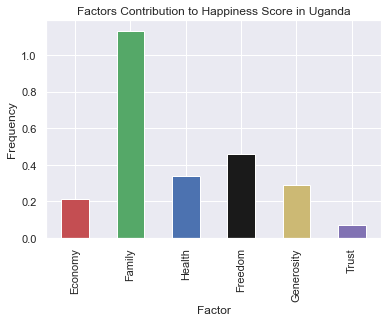

In [ ]:
#ploting the  contribution of the factors to the happiness of Uganda

bar_heights = df2015[factors].iloc[140].values  #location index= 140 ----> Uganda
bar_positions = np.arange(6)
tick_positions = range(0,6)

fig,ax2=plt.subplots()
ax2.bar(bar_positions,bar_heights,0.5,color=list('rgbkymc'))
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(factors,rotation=90)
ax2.set_xlabel("Factor")
ax2.set_ylabel("Frequency")
ax2.set_title("Factors Contribution to Happiness Score in Uganda")
plt.show()

# we notice that the Family factor highly contributes to the happiness of Uganda 

### 5.Comparing the World Happiness between 2015-2019

In [ ]:
#openning the data sets: 

df2016=pd.read_csv("2016.csv")
df2017=pd.read_csv("2017.csv")
df2018=pd.read_csv("2018.csv")
df2019=pd.read_csv("2019.csv")

In [ ]:
#checking the size of the data sets:

print(df2015.shape,"2015")
print(df2016.shape,"2016")
print(df2017.shape,"2017")
print(df2018.shape,"2018")
print(df2019.shape,"2019")

(158, 10) 2015
(157, 13) 2016
(155, 12) 2017
(156, 9) 2018
(156, 9) 2019


In [ ]:
#printing the values of the columns:

print("2015 report:\n",df2015.columns.values,"\n")
print("2016 report:\n",df2016.columns.values,"\n")
print("2017 report:\n",df2017.columns.values,"\n")
print("2018 report:\n",df2018.columns.values,"\n")
print("2019 report:\n",df2019.columns.values,"\n")

2015 report:
 ['Country' 'Region' 'Happiness_Rank' 'Happiness_Score' 'Economy' 'Family'
 'Health' 'Freedom' 'Trust' 'Generosity'] 

2016 report:
 ['Country' 'Region' 'Happiness Rank' 'Happiness Score'
 'Lower Confidence Interval' 'Upper Confidence Interval'
 'Economy (GDP per Capita)' 'Family' 'Health (Life Expectancy)' 'Freedom'
 'Trust (Government Corruption)' 'Generosity' 'Dystopia Residual'] 

2017 report:
 ['Country' 'Happiness.Rank' 'Happiness.Score' 'Whisker.high' 'Whisker.low'
 'Economy..GDP.per.Capita.' 'Family' 'Health..Life.Expectancy.' 'Freedom'
 'Generosity' 'Trust..Government.Corruption.' 'Dystopia.Residual'] 

2018 report:
 ['Overall rank' 'Country or region' 'Score' 'GDP per capita'
 'Social support' 'Healthy life expectancy' 'Freedom to make life choices'
 'Generosity' 'Perceptions of corruption'] 

2019 report:
 ['Overall rank' 'Country or region' 'Score' 'GDP per capita'
 'Social support' 'Healthy life expectancy' 'Freedom to make life choices'
 'Generosity' 'Percept

In [ ]:
#checking if there is null values in the data sets:
print('2016:\n\n',df2016.isnull().any())
print('\n2017:\n\n',df2017.isnull().any())
print('\n2018:\n\n',df2018.isnull().any())
print('\n2019:\n\n',df2019.isnull().any())

2016:

 Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Lower Confidence Interval        False
Upper Confidence Interval        False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

2017:

 Country                          False
Happiness.Rank                   False
Happiness.Score                  False
Whisker.high                     False
Whisker.low                      False
Economy..GDP.per.Capita.         False
Family                           False
Health..Life.Expectancy.         False
Freedom                          False
Generosity                       False
Trust..Government.Corruption.    False
Dystopia.Residual                Fa

In [ ]:
df2018[df2018.isna().values]
#there is null value in report 2018 in column Perceptions of corruption

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [ ]:
#Filling the null value by the mean of this column 
df2018['Perceptions of corruption'] = df2018['Perceptions of corruption'].fillna(df2018['Perceptions of corruption'].mean())
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## Preparing the data to merge all the reports together

In [ ]:
#adding Year column to the all reports, dropping some columns, changing the names of some columns to make the format identical for all the reports

df2015["Year"]='2015'
df2016["Year"]='2016'
df2017["Year"]='2017'
df2018["Year"]='2018'
df2019["Year"]='2019'

df2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval','Dystopia Residual'], axis=1, inplace=True)
df2017.drop(['Whisker.high', 'Whisker.low','Dystopia.Residual'], axis=1, inplace=True)


df2016.columns=['Country', 'Region', 'Happiness_Rank', 'Happiness_Score','Economy', 'Family', 'Health','Freedom', 'Trust', 'Generosity','Year']
df2017.columns=['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family','Health', 'Freedom', 'Generosity', 'Trust', 'Year']
df2018.columns=['Happiness_Rank', 'Country', 'Happiness_Score', 'Economy','Family', 'Health','Freedom', 'Generosity','Trust', 'Year']
df2019.columns=['Happiness_Rank', 'Country', 'Happiness_Score', 'Economy','Family', 'Health',  'Freedom ', 'Generosity','Trust','Year']


## Adding the Region column to 2017,2018,2019 reports

In [ ]:
#merging  2016 report and  2017 report  On the basis of Country column, adding suffixes to mark the columns
#The reason why I chose 2016 report to add the region column not 2015 report : 
#to get less null values after the merging and to drop less rows as we will see later
df2017_new=pd.merge(left=df2016, right=df2017, how = 'left', on='Country',suffixes=("_2016","_2017"))
df2017_new.head(2)

,Country,Region,Happiness_Rank_2016,Happiness_Score_2016,Economy_2016,Family_2016,Health_2016,Freedom_2016,Trust_2016,Generosity_2016,Year_2016,Happiness_Rank_2017,Happiness_Score_2017,Economy_2017,Family_2017,Health_2017,Freedom_2017,Generosity_2017,Trust_2017,Year_2017
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016,2.0,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016,4.0,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017


In [ ]:
#We need to keep just the Region column from 2016 report, and droping the rest of 2016 columns,then changing the names of the columns to standardize he format of the data sets
df2017_new.drop(['Happiness_Rank_2016','Happiness_Score_2016','Economy_2016','Family_2016','Health_2016','Freedom_2016','Trust_2016','Generosity_2016','Year_2016'], axis=1, inplace=True)
df2017_new.columns=['Country','Region' ,'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family','Health', 'Freedom', 'Generosity', 'Trust', 'Year']
df2017=df2017_new
df2017.head(2)

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust,Year
0,Denmark,Western Europe,2.0,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
1,Switzerland,Western Europe,4.0,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017


In [ ]:
#The same process with 2018 report:
df2018_new=pd.merge(left=df2016, right=df2018, how = 'left', on='Country',suffixes=("_2016","_2018"))
df2018_new.drop(['Happiness_Rank_2016',
'Happiness_Score_2016','Economy_2016','Family_2016','Health_2016','Freedom_2016','Trust_2016','Generosity_2016','Year_2016'], axis=1, inplace=True)
df2018_new.columns=['Country','Region' ,'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family','Health', 'Freedom', 'Generosity', 'Trust', 'Year']
df2018=df2018_new
df2018.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust,Year
0,Denmark,Western Europe,3.0,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
1,Switzerland,Western Europe,5.0,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
2,Iceland,Western Europe,4.0,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
3,Norway,Western Europe,2.0,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
4,Finland,Western Europe,1.0,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018


In [ ]:
#The same process with 2019 report:
df2019_new=pd.merge(left=df2016, right=df2019, how = 'left', on='Country',suffixes=("_2016","_2019"))
df2019_new.drop(['Happiness_Rank_2016',
'Happiness_Score_2016','Economy_2016','Family_2016','Health_2016','Freedom','Trust_2016','Generosity_2016','Year_2016'], axis=1, inplace=True)
df2019_new.columns=['Country','Region' ,'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family','Health', 'Freedom', 'Generosity', 'Trust', 'Year']
df2019=df2019_new
df2019.head(2)

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust,Year
0,Denmark,Western Europe,2.0,7.60,1.383,1.573,0.996,0.592,0.252,0.410,2019
1,Switzerland,Western Europe,6.0,7.48,1.452,1.526,1.052,0.572,0.263,0.343,2019


### Dealing with the null values after adding the Region coulmn:

In [ ]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          157 non-null    object 
 1   Region           157 non-null    object 
 2   Happiness_Rank   150 non-null    float64
 3   Happiness_Score  150 non-null    float64
 4   Economy          150 non-null    float64
 5   Family           150 non-null    float64
 6   Health           150 non-null    float64
 7   Freedom          150 non-null    float64
 8   Generosity       150 non-null    float64
 9   Trust            150 non-null    float64
 10  Year             150 non-null    object 
dtypes: float64(8), object(3)
memory usage: 14.7+ KB


In [ ]:
#after  merging we got null values
#filling Year column= 2017
#filling the factor columns with the mean of that column
df2017_new['Year'] = df2017_new['Year'].fillna(2017)
df2017['Economy'] = df2017['Economy'].fillna(df2017['Economy'].mean())
df2017['Family'] = df2017['Family'].fillna(df2017['Family'].mean())
df2017['Health'] = df2017['Health'].fillna(df2017['Health'].mean())
df2017['Freedom'] = df2017['Freedom'].fillna(df2017['Freedom'].mean())
df2017['Generosity'] = df2017['Generosity'].fillna(df2017['Generosity'].mean())
df2017['Trust'] = df2017['Trust'].fillna(df2017['Trust'].mean())
df2017['Happiness_Score'] = df2017['Happiness_Score'].fillna(df2017['Happiness_Score'].mean())
df2017[df2017.isna().values]

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust,Year
14,Puerto Rico,Latin America and Caribbean,NaN,5.37952,0.992605,1.19714,0.557302,0.409114,0.245823,0.122472,2017
34,Taiwan,Eastern Asia,NaN,5.37952,0.992605,1.19714,0.557302,0.409114,0.245823,0.122472,2017
39,Suriname,Latin America and Caribbean,NaN,5.37952,0.992605,1.19714,0.557302,0.409114,0.245823,0.122472,2017
74,Hong Kong,Eastern Asia,NaN,5.37952,0.992605,1.19714,0.557302,0.409114,0.245823,0.122472,2017
96,Somaliland Region,Sub-Saharan Africa,NaN,5.37952,0.992605,1.19714,0.557302,0.409114,0.245823,0.122472,2017
101,Laos,Southeastern Asia,NaN,5.37952,0.992605,1.19714,0.557302,0.409114,0.245823,0.122472,2017
137,Comoros,Sub-Saharan Africa,NaN,5.37952,0.992605,1.19714,0.557302,0.409114,0.245823,0.122472,2017


In [ ]:
#dropping the rows with null values 
print('2017 Report Shape:\n')
print('before',df2017.shape)
df2017 = df2017.dropna(how='any')           
df2017.dropna(how='any', inplace=True)  
print('after',df2017.shape)

2017 Report Shape:

before (157, 11)
after (150, 11)


<ipython-input-68-d220ac7d39bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017.dropna(how='any', inplace=True)


In [ ]:
#dropping the rows with null value
print('2018 Report Shape:\n')
print('before',df2018.shape)
df2018 = df2018.dropna(how='any')           
df2018.dropna(how='any', inplace=True)  
print('after',df2018.shape)

2018 Report Shape:

before (157, 11)
after (151, 11)


<ipython-input-69-827ad17b2dbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018.dropna(how='any', inplace=True)


In [ ]:
#dropping the rows with null value
print('201 Report Shape:\n')
print('before',df2019.shape)
df2019 = df2019.dropna(how='any')           
df2019.dropna(how='any', inplace=True)  
print('after',df2019.shape)

201 Report Shape:

before (157, 11)
after (148, 11)


<ipython-input-70-a3b70cab1c94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019.dropna(how='any', inplace=True)


In [ ]:
#printing the 5 happiest countries between 2015-2019
top5_2015=df2015[['Country','Region','Happiness_Rank','Happiness_Score','Year']].sort_values(by=['Happiness_Rank']).head()
top5_2016=df2016[['Country','Region','Happiness_Rank','Happiness_Score','Year']].sort_values(by=['Happiness_Rank']).head()
top5_2017=df2017[['Country','Region','Happiness_Rank','Happiness_Score','Year']].sort_values(by=['Happiness_Rank']).head()
top5_2018=df2018[['Country','Region','Happiness_Rank','Happiness_Score','Year']].sort_values(by=['Happiness_Rank']).head()
top5_2019=df2019[['Country','Region','Happiness_Rank','Happiness_Score','Year']].sort_values(by=['Happiness_Rank']).head()
print(top5_2015,'\n')
print(top5_2016,'\n')
print(top5_2017,'\n')
print(top5_2018,'\n')
print(top5_2019,'\n')

#we can notice that Iceland,Denemark,Norway in the top 5 happiest countries  between 2015-2019
#Finland in the top 5 happiest countries between 2016-2019
#Switzerland in the top 5 happiest countries between 2016-2018
#all the countries except of Canada lay in  Western Europe Region 

       Country          Region  Happiness_Rank  Happiness_Score  Year
0  Switzerland  Western Europe               1            7.587  2015
1      Iceland  Western Europe               2            7.561  2015
2      Denmark  Western Europe               3            7.527  2015
3       Norway  Western Europe               4            7.522  2015
4       Canada   North America               5            7.427  2015 

       Country          Region  Happiness_Rank  Happiness_Score  Year
0      Denmark  Western Europe               1            7.526  2016
1  Switzerland  Western Europe               2            7.509  2016
2      Iceland  Western Europe               3            7.501  2016
3       Norway  Western Europe               4            7.498  2016
4      Finland  Western Europe               5            7.413  2016 

       Country          Region  Happiness_Rank  Happiness_Score  Year
3       Norway  Western Europe             1.0            7.537  2017
0      Denmark  

In [ ]:
#printing the 5 least happy countries between 2015-2019
tail_2015=df2015[['Country','Region','Happiness_Rank','Year']].sort_values(by=['Happiness_Rank']).tail()
tail_2016=df2016[['Country','Region','Happiness_Rank','Year']].sort_values(by=['Happiness_Rank']).tail()
tail_2017=df2017[['Country','Region','Happiness_Rank','Year']].sort_values(by=['Happiness_Rank']).tail()
tail_2018=df2018[['Country','Region','Happiness_Rank','Year']].sort_values(by=['Happiness_Rank']).tail()
tail_2019=df2019[['Country','Region','Happiness_Rank','Year']].sort_values(by=['Happiness_Rank']).tail()
print(tail_2015,'\n')
print(tail_2016,'\n')
print(tail_2017,'\n')
print(tail_2018,'\n')
print(tail_2019,'\n')

#Syria,Rwanda,Burundi,Togo,Tannzania are the least happy countries between 2015-2019
#most of the countries lie in Sub-Sahran Africa (The least Happy Region 2015-2019)

     Country                           Region  Happiness_Rank  Year
153   Rwanda               Sub-Saharan Africa             154  2015
154    Benin               Sub-Saharan Africa             155  2015
155    Syria  Middle East and Northern Africa             156  2015
156  Burundi               Sub-Saharan Africa             157  2015
157     Togo               Sub-Saharan Africa             158  2015 

         Country                           Region  Happiness_Rank  Year
152        Benin               Sub-Saharan Africa             153  2016
153  Afghanistan                    Southern Asia             154  2016
154         Togo               Sub-Saharan Africa             155  2016
155        Syria  Middle East and Northern Africa             156  2016
156      Burundi               Sub-Saharan Africa             157  2016 

      Country                           Region  Happiness_Rank  Year
154      Togo               Sub-Saharan Africa           150.0  2017
151    Rwanda     

### Joining  all the reports together  and  Exploring the new data:

In [ ]:
#joining all the reports together and displaying the result 
df=pd.concat([df2015,df2016,df2017,df2018,df2019],axis=0,ignore_index=True)
df.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
df.tail()

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
759,Benin,Sub-Saharan Africa,102.0,4.883,0.393,0.437,0.397,0.349,0.082,0.175,2019
760,Afghanistan,Southern Asia,154.0,3.203,0.350,0.517,0.361,0.000,0.025,0.158,2019
761,Togo,Sub-Saharan Africa,139.0,4.085,0.275,0.572,0.410,0.293,0.085,0.177,2019
762,Syria,Middle East and Northern Africa,149.0,3.462,0.619,0.378,0.440,0.013,0.141,0.331,2019
763,Burundi,Sub-Saharan Africa,145.0,3.775,0.046,0.447,0.380,0.220,0.180,0.176,2019


In [ ]:
df.info()   #we have 11 columns,764 rows,no null values, 3 categorical varaibles (country,egion,year) 9 numerical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          764 non-null    object 
 1   Region           764 non-null    object 
 2   Happiness_Rank   764 non-null    float64
 3   Happiness_Score  764 non-null    float64
 4   Economy          764 non-null    float64
 5   Family           764 non-null    float64
 6   Health           764 non-null    float64
 7   Freedom          764 non-null    float64
 8   Trust            764 non-null    float64
 9   Generosity       764 non-null    float64
 10  Year             764 non-null    object 
dtypes: float64(8), object(3)
memory usage: 65.8+ KB


In [ ]:
df.describe() #statistics of the numerical variables in the new data set

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,78.078534,5.396399,0.921659,1.080509,0.617313,0.411159,0.125790,0.218848
std,45.054202,1.121725,0.402556,0.325072,0.242639,0.154000,0.106413,0.123233
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,4.516250,0.628018,0.868264,0.450730,0.309308,0.054750,0.129941
50%,78.000000,5.334000,0.985000,1.122823,0.650166,0.432056,0.090405,0.202000
75%,117.000000,6.203750,1.238855,1.330237,0.808289,0.531730,0.155523,0.279940
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


In [ ]:
#finding the percentages of the social factors 

def percentages(factor):
    return factor/df["Happiness_Score"]*100

df[factors].apply(percentages) #apply the function percentages to all the numerical columns

,Economy,Family,Health,Freedom,Generosity,Trust
0,18.406617,17.787136,12.408462,8.772506,3.911691,5.532885
1,17.224177,18.545563,12.535908,8.315963,5.770401,1.870784
2,17.609672,18.075993,11.620035,8.627342,4.535539,6.424472
3,19.396437,17.694097,11.768280,8.903616,4.613002,4.852832
4,17.857681,17.808132,12.193753,8.522553,6.168170,4.437458
...,...,...,...,...,...,...
759,8.048331,8.949416,8.130248,7.147246,3.583862,1.679296
760,10.927256,16.141118,11.270684,0.000000,4.932875,0.780518
761,6.731946,14.002448,10.036720,7.172583,4.332925,2.080783
762,17.879838,10.918544,12.709417,0.375505,9.560947,4.072790


In [ ]:
#The mean of the percentages of the social factors 2015-2019 
df[factors].apply(percentages).mean()

Economy       16.533210
Family        20.045097
Health        11.215115
Freedom        7.629721
Generosity     4.207790
Trust          2.304084
dtype: float64

<AxesSubplot:ylabel='value'>

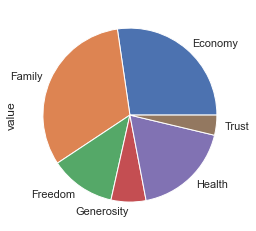

In [ ]:
#Plotting the percentages of the factors 2015-2019
pd.melt(df,main_cols,factors).pivot_table(index="variable",values="value").plot(kind="pie",y="value",legend=False)
#The Family Factor is the highest contributer ro the world happiness followed by Economy and Health 

In [ ]:
#converting the numerical variables (social factors) to categorical variables
def high_low(factor):
    if factor > 1:
        return 'High'
    else:
        return 'Low'
df[factors].applymap(high_low)

,Economy,Family,Health,Freedom,Generosity,Trust
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low
...,...,...,...,...,...,...
759,Low,Low,Low,Low,Low,Low
760,Low,Low,Low,Low,Low,Low
761,Low,Low,Low,Low,Low,Low
762,Low,Low,Low,Low,Low,Low


In [ ]:
#finding the percentages of high_low function

def high_low_percentage(factor):
    return (factor.value_counts()/factor.size)*100

df[factors].applymap(high_low).apply(high_low_percentage)

#again we can see that Ecnomy,Family,Health factors are the highest and contribute more to the happiness in the world

,Economy,Family,Health,Freedom,Generosity,Trust
High,48.036649,63.219895,2.879581,NaN,NaN,NaN
Low,51.963351,36.780105,97.120419,100.0,100.0,100.0


In [ ]:
len(df["Region"].unique())  #10 Regions

10

In [ ]:
pd.pivot_table(df, index= 'Region', columns='Year', values="Happiness_Score")


Year,2015,2016,2017,2018,2019
Region,,,,,
Australia and New Zealand,7.285000,7.323500,7.299000,7.298000,7.267500
Central and Eastern Europe,5.332931,5.370690,5.409931,5.463966,5.571786
Eastern Asia,5.626167,5.624167,5.496500,5.672000,5.688833
Latin America and Caribbean,6.144682,6.101750,5.957818,5.938619,5.942550
Middle East and Northern Africa,5.406900,5.386053,5.369684,5.282737,5.237000
North America,7.273000,7.254000,7.154500,7.107000,7.085000
Southeastern Asia,5.317444,5.338889,5.444875,5.313444,5.273667
Southern Asia,4.580857,4.563286,4.628429,4.603857,4.526857
Sub-Saharan Africa,4.202800,4.136421,4.147639,4.230500,4.340657


In [ ]:
#by checking back the order of the happiest regions.we can see that the only change between 2015-2019 is  the rank of Central and Eastern Europe and Middle East and Northern Africa
#The other regions save their ranks

Text(0, 0.5, 'Happiness Score')

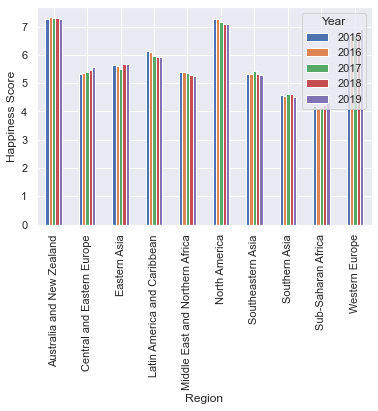

In [ ]:
#plotting how did the happiness score change in each region between 2015-2019
pd.pivot_table(df, index= 'Region', columns= 'Year', values= "Happiness_Score").plot(kind= 'bar')
plt.ylabel("Happiness Score")

In [ ]:
len(df["Country"].unique()) #164 countries

164

<AxesSubplot:xlabel='Family', ylabel='Country'>

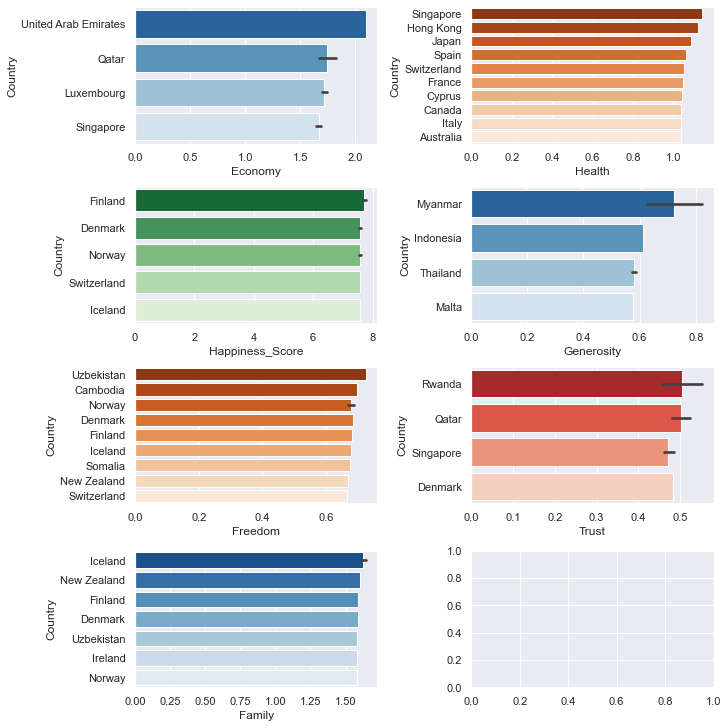

In [ ]:
# plotting the countries that have the highest rate in each Social Factor in all the years 
fig, axes = plt.subplots(nrows=4, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Happiness_Score' ,y='Country',data=df.nlargest(10,'Happiness_Score'),ax=axes[1,0],palette='Greens_r')
sns.barplot(x='Economy',y='Country',data=df.nlargest(10,'Economy'),ax=axes[0,0],palette="Blues_r")
sns.barplot(x='Health' ,y='Country',data=df.nlargest(10,'Health'),ax=axes[0,1],palette='Oranges_r')
sns.barplot(x='Generosity' ,y='Country',data=df.nlargest(10,'Generosity'),ax=axes[1,1],palette='Blues_r')
sns.barplot(x='Freedom' ,y='Country',data=df.nlargest(10,'Freedom'),ax=axes[2,0],palette='Oranges_r')
sns.barplot(x='Trust' ,y='Country',data=df.nlargest(10,'Trust'),ax=axes[2,1],palette='Reds_r')
sns.barplot(x='Family' ,y='Country',data=df.nlargest(10,'Family'),ax=axes[3,0],palette='Blues_r')

In [ ]:
#From The graph above we can see that:
#Finland is the country with the highest Happiness Score in the years 2015-2019
#UAE is the country with the strongest Economy in the years 2015-2019
#Iceland is the country with highest social support(family) in the years 2015-2019
#Singapore is the country with best health in the years 2015-2019
#Uzbekistan is the country with the highest freedom in the years 2015-2019
#Myanmar is the country with the highest Generosity in the years 2015-2019
#Rawanda is the country with the highest Trust in the years 2015-2019

<AxesSubplot:xlabel='Family', ylabel='Country'>

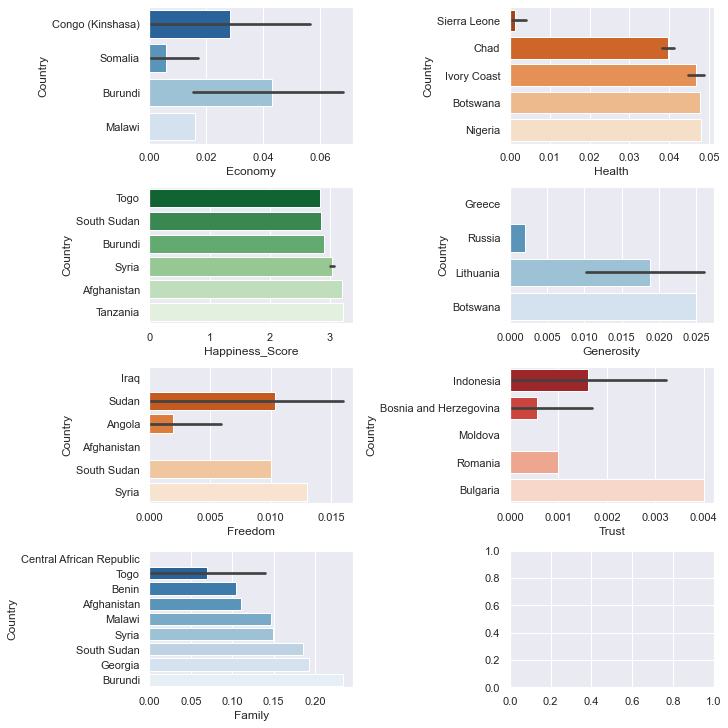

In [ ]:
# plotting the countries that have the lowest rate in each Social Factor in all the years 
fig, axes = plt.subplots(nrows=4, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Happiness_Score' ,y='Country',data=df.nsmallest(10,'Happiness_Score'),ax=axes[1,0],palette='Greens_r')
sns.barplot(x='Economy',y='Country',data=df.nsmallest(10,'Economy'),ax=axes[0,0],palette="Blues_r")
sns.barplot(x='Health' ,y='Country',data=df.nsmallest(10,'Health'),ax=axes[0,1],palette='Oranges_r')
sns.barplot(x='Generosity' ,y='Country',data=df.nsmallest(10,'Generosity'),ax=axes[1,1],palette='Blues_r')
sns.barplot(x='Freedom' ,y='Country',data=df.nsmallest(10,'Freedom'),ax=axes[2,0],palette='Oranges_r')
sns.barplot(x='Trust' ,y='Country',data=df.nsmallest(10,'Trust'),ax=axes[2,1],palette='Reds_r')
sns.barplot(x='Family' ,y='Country',data=df.nsmallest(10,'Family'),ax=axes[3,0],palette='Blues_r')

In [ ]:
#From The graph above we can see that:
#Togo is the country with the lowest Happiness Score in the years 2015-2019
#Somalia is the country with the lowest Economy in the years 2015-2019
#Central African Republic  is the country with lowest social support(family) in the years 2015-2019 = zero
#Sierra Leone  is the country with worst health in the years 2015-2019
#Iraq and Afghanistan are  the countries with the lowest freedom in the years 2015-2019 
#Greece is the country with the lowest Generosity in the years 2015-2019
#Moldova  is the country with the lowest Trust in the years 2015-2019

<AxesSubplot:xlabel='Family', ylabel='Region'>

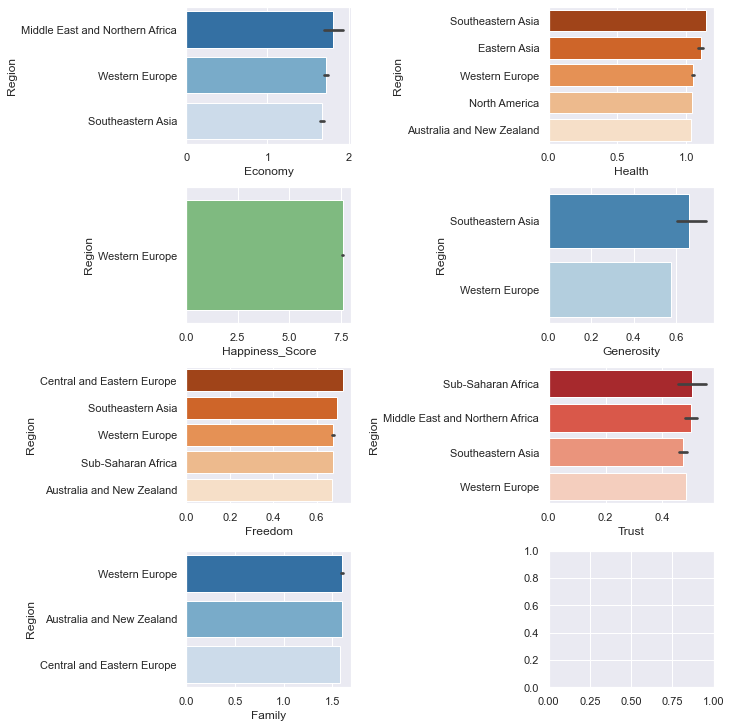

In [ ]:
# plotting the regions that have the highest rate in each Social Factor in all the years 
fig, axes = plt.subplots(nrows=4, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Economy',y='Region',data=df.nlargest(10,'Economy'),ax=axes[0,0],palette="Blues_r")
sns.barplot(x='Health' ,y='Region',data=df.nlargest(10,'Health'),ax=axes[0,1],palette='Oranges_r')
sns.barplot(x='Happiness_Score' ,y='Region',data=df.nlargest(10,'Happiness_Score'),ax=axes[1,0],palette='Greens_r')
sns.barplot(x='Generosity' ,y='Region',data=df.nlargest(10,'Generosity'),ax=axes[1,1],palette='Blues_r')
sns.barplot(x='Freedom' ,y='Region',data=df.nlargest(10,'Freedom'),ax=axes[2,0],palette='Oranges_r')
sns.barplot(x='Trust' ,y='Region',data=df.nlargest(10,'Trust'),ax=axes[2,1],palette='Reds_r')
sns.barplot(x='Family' ,y='Region',data=df.nlargest(10,'Family'),ax=axes[3,0],palette='Blues_r')

In [ ]:
#From The graph above we can see that:
#Western Europe is the region with the highest Happiness Score in the years 2015-2019
#Middle East and Northern Africa is the region with the strongest Economy in the years 2015-2019
#Western Europeis the region with highest social support(family) in the years 2015-2019
#Southeastern Asia is the region with best health in the years 2015-2019
#Central and Eastern Europe  is the region with the highest freedom in the years 2015-2019
#Southeastern Asia is the region with the highest Generosity in the years 2015-2019
#Sub-Saharan Africa is the region with the highest Trust in the years 2015-2019

<AxesSubplot:xlabel='Family', ylabel='Region'>

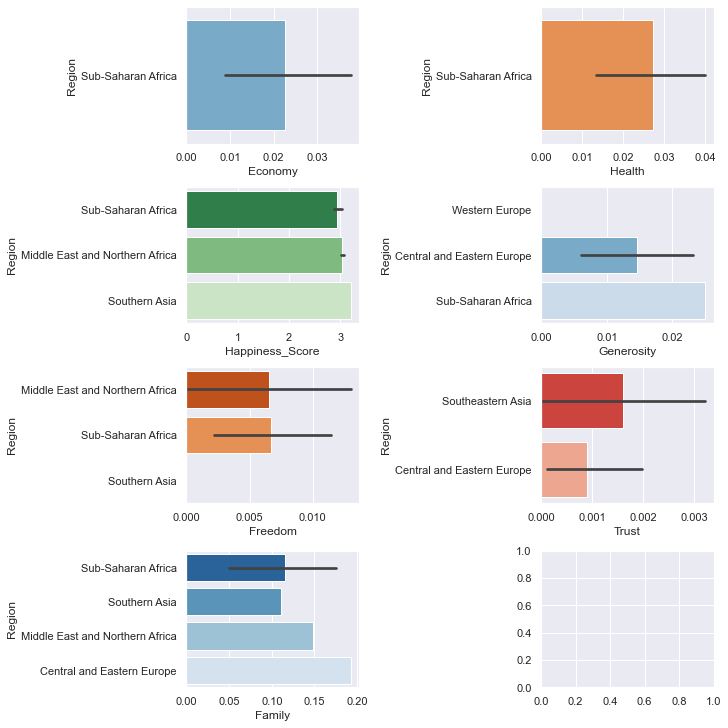

In [ ]:
# plotting the regions that have the lowest rate in each Social Factor in all the years 
fig, axes = plt.subplots(nrows=4, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Economy',y='Region',data=df.nsmallest(10,'Economy'),ax=axes[0,0],palette="Blues_r")
sns.barplot(x='Health' ,y='Region',data=df.nsmallest(10,'Health'),ax=axes[0,1],palette='Oranges_r')
sns.barplot(x='Happiness_Score' ,y='Region',data=df.nsmallest(10,'Happiness_Score'),ax=axes[1,0],palette='Greens_r')
sns.barplot(x='Generosity' ,y='Region',data=df.nsmallest(10,'Generosity'),ax=axes[1,1],palette='Blues_r')
sns.barplot(x='Freedom' ,y='Region',data=df.nsmallest(10,'Freedom'),ax=axes[2,0],palette='Oranges_r')
sns.barplot(x='Trust' ,y='Region',data=df.nsmallest(10,'Trust'),ax=axes[2,1],palette='Reds_r')
sns.barplot(x='Family' ,y='Region',data=df.nsmallest(10,'Family'),ax=axes[3,0],palette='Blues_r')

In [ ]:
#From The graph above we can see that:
#Sub-Saharan Africa is the region with the lowest Happiness Score in the years 2015-2019
#Sub-Saharan Africa is the region with the worst Economy in the years 2015-2019
#Southern Asia the region with lowest social support(family) in the years 2015-2019
#Sub-Saharan Africa is the region with worst health in the years 2015-2019
#Southern Asia   is the region with the lowest freedom in the years 2015-2019
#Western Europe is the region with the lowest Generosity in the years 2015-2019
#Central and Eastern  Europe is the region with the lowest Trust in the years 2015-2019

In [ ]:
#the changing of happiness score mean from 2015-2019
pd.pivot_table(df, index= 'Year', values= "Happiness_Score")
#we notice that the mean of the happiness score is almost the same (no change)

,Happiness_Score
Year,
2015,5.375734
2016,5.382185
2017,5.379520
2018,5.399391
2019,5.447595


<AxesSubplot:title={'center':'Mean Happiness Scores by Year'}, xlabel='Year'>

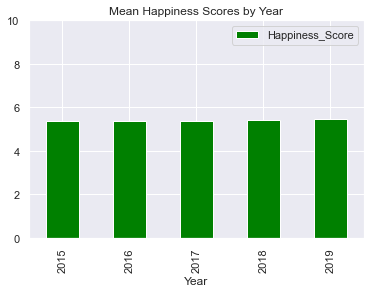

In [ ]:
#plotting the changing of happiness score mean from 2015-2019
df.pivot_table(values="Happiness_Score",index="Year",aggfunc=np.mean).plot(kind="bar",title='Mean Happiness Scores by Year',ylim=(0,10),color="green")

In [ ]:
#Saving all the changes that We did to new csv file
df.to_csv('Project.csv') 

## Conclusion:

According to this analysis,we explored 164 countries in 10 regions. we can see 
that Family, followed by Economy and Health  have the maximum effect in determining the happiness of people in a country.
The happiest country is FInland, the least happy country is Togo.
We can see that the happiest countries in the years between  2015-2019 lie in Westren Europe and the least happy countries in the same period lie in Sub-Saharan Africa.
The mean of happiness score in the years between 2015-2019, almost did not change, the highest in 2019= 5.447595, Does that mean that we were happier in 2019 than in 2015!